In [46]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
df_csv = pd.read_csv('cleanDatasets/master_dataset2010.csv')
df = pd.DataFrame(df_csv)
print(len(df))
print(list(df))

681
['business_name', 'lic_code', 'street_address', 'business_start_date', 'business_end_date', 'Lifespan', 'isClosed', 'full_address', 'business_id', 'name', 'district', 'MA', 'year', 'latitude', 'longitude', 'tract', 'GEOID10', 'link', 'HC01_VC05', 'HC01_VC113', 'HC01_VC115', 'HC01_VC117', 'HC01_VC121', 'HC01_VC28', 'HC01_VC36', 'HC01_VC41', 'HC01_VC42', 'HC01_VC43', 'HC01_VC44', 'HC01_VC50', 'HC01_VC51', 'HC01_VC52', 'HC01_VC53', 'HC01_VC54', 'HC01_VC55', 'HC01_VC56', 'HC01_VC57', 'HC01_VC58', 'HC01_VC59', 'HC01_VC60', 'HC01_VC61', 'HC01_VC62', 'HC01_VC67', 'HC01_VC68', 'HC01_VC69', 'HC01_VC85', 'HC01_VC86', 'HC01_VC89', 'HC01_VC99', 'HC03_VC05', 'HC03_VC13', 'HC03_VC156', 'HC03_VC28', 'HC03_VC41', 'HC03_VC42', 'HC03_VC43', 'HC03_VC44', 'HC03_VC45', 'HC03_VC50', 'HC03_VC51', 'HC03_VC52', 'HC03_VC53', 'HC03_VC54', 'HC03_VC55', 'HC03_VC56', 'HC03_VC57', 'HC03_VC58', 'HC03_VC59', 'HC03_VC60', 'HC03_VC61', 'HC03_VC62', 'HC03_VC67', 'HC03_VC68', 'HC03_VC69', 'HC03_VC75', 'HC03_VC76', 'HC

In [48]:
df_reg = df[[
    'isClosed','lic_code_cat','rating'
]].dropna()

# Testing X Variables:
    # 'rating','isClosed','Lifespan','MA','Opening_year','price_level','Foodie_16','Foodie_17','lic_code_cat'

In [49]:
len(df_reg)
print(str(len(df_reg[df_reg['isClosed']==0])/len(df_reg)) + "% of the dataset are closed locations") # no: 1, yes: 0

0.08516886930983847% of the dataset are closed locations


In [50]:
######################################## Simple Linear Regression ######################################################

In [51]:
from sklearn.linear_model import LinearRegression

X = df_reg.drop('isClosed',axis = 1)
y = df_reg["isClosed"].values.reshape(-1, 1)
print(X.shape, y.shape)

(681, 2) (681, 1)


In [52]:
# Ref: https://becominghuman.ai/stats-models-vs-sklearn-for-linear-regression-f19df95ad99b
from sklearn import linear_model as lm

# X = df_reg["Lifespan"].values.reshape(-1, 1)
# y = df_reg["isClosed"]

model = lm.LinearRegression()
results = model.fit(X,y)
print(model.intercept_,model.coef_)

[0.55306814] [[0.08346552 0.05788601]]


In [53]:
import statsmodels.api as sm

print("If the Prob(Omnibus) is very small, and I took this to mean <.05 as this is standard statistical practice, then our data is probably not normal. ")
print(' ')

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

If the Prob(Omnibus) is very small, and I took this to mean <.05 as this is standard statistical practice, then our data is probably not normal. 
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     78.69
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           1.86e-31
Time:                        14:26:33   Log-Likelihood:                -26.221
No. Observations:                 681   AIC:                             58.44
Df Residuals:                     678   BIC:                             72.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5531      0.121      4.559      0.000       0.315       0.791
lic_code_cat     0.0835      0.007     12.484      0.000       0.070       0.097
rating           0.0579      0.028      2.034      0.042       0.002       0.114
==============================================================================
Omnibus:                      295.040   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.913
Skew:                          -2.110   Prob(JB):                    2.81e-228
Kurtosis:                       7.372   Cond. No.                         59.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
########################################### Prediction Model ######################################################

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(model.intercept_,model.coef_)

Training Score: 0.18761865372735653
Testing Score: 0.18981318474295186
[0.59946542] [[0.         0.08288012 0.04681763]]


<IPython.core.display.Javascript object>


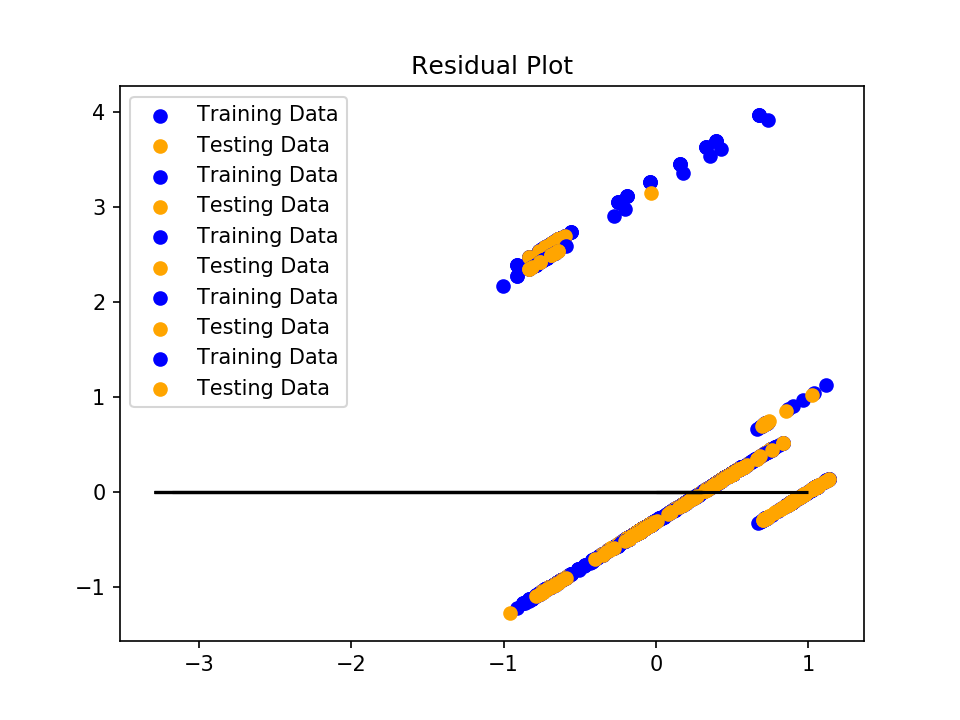

Text(0.5,1,'Residual Plot')

In [57]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [58]:
print('There are three primary metrics used to evaluate linear models. Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE)' + ' ' +
'1) MAE: The easiest to understand. Represents average error' + ' ' +
'2) MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular' + ' ' +
'3) RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model'    
      )
# Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

There are three primary metrics used to evaluate linear models. Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE) 1) MAE: The easiest to understand. Represents average error 2) MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular 3) RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model


In [ ]:
###################################Linear Regression (SCALED) ########################################################

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [77]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [69]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.781369308662589, R2: 0.24616257273110298


In [70]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7839182220611368, R2: 0.24370347138505533


In [71]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7813711963547693, R2: 0.2461607515525631


In [72]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7830974896621629, R2: 0.24449528492733252


In [ ]:
#########################################################################################################################

In [ ]:
# Ref: https://github.com/alifier/Restaurant_success_model/blob/master/Restaurants_yelp_ML_final.ipynb

In [ ]:
clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)

In [ ]:
# Split in features and target
df_ml_features = df_reg
df_ml_target = df['Lifespan']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_features, df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

In [ ]:
clf.fit(X_train,list(y_train.values))
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred))
print('Recall: ',recall_score(list(y_test.values),y_pred))
print('F1 Score: ',f1_score(list(y_test.values),y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))